###### Tez Projesi Çalışması
###### Çetin KAYA
###### 210904012

# **ÇALIŞAN DÖNÜŞÜM HIZI TAHMİNLEME**#
Giriş
Bu araştırma yıpranmaya bağlı olarak çalışan devir hızının tahminlenmesi ve buna neden faktörlerin ortaya çıkarılmasını amaçlamaktadır.
Kaggle uygulamasından seçilen veri seti üzerinden çeşitli makine öğrenmesi yöntemleri uygulanarak analizler yapılacaktır. Devamında oluşan öğretilen model ile oluşan sonuçlar test edilecektir.

 Çalışan devri ("çalışan kaybı" olarak da bilinir) şirketler için maliyetli bir sorundur. Bir çalışanı değiştirmenin gerçek maliyeti genellikle oldukça yüksek olabilir. Center for American Progress tarafından yapılan bir araştırma, şirketlerin bir çalışanı değiştirmek için genellikle o çalışanın maaşının yaklaşık beşte birini ödediğini ve yöneticiler veya en yüksek maaşlı çalışanlar değiştirilecekse maliyetin önemli ölçüde artabileceğini ortaya koymuştur. Başka bir deyişle, çoğu işveren için çalışanlarını değiştirmenin maliyeti önemli olmaya devam etmektedir. Bunun nedeni, mülakat yapmak ve yerine birini bulmak için harcanan zaman, işe başlama ikramiyeleri ve yeni çalışan yeni rolüne alışırken birkaç ay boyunca yaşanan üretkenlik kaybıdır.



Veri setini "https://www.kaggle.com/code/hamzaben/employee-churn-model-w-strategic-retention-plan" adresinden bulabilirsiniz.


## 1. Veri Setinin Hazırlanması
Veri temizleme ve hazırlama işlemleri veri üzerinde uygun bir analiz yapmak için oldukça önemli bir adımdır. Veri seti kaynağından alınarak düzgün bir formatta proje ortamına aktırılması için hazırlandı. Çalışma ortamı kuruldu.

## 2. Verilerin Alınması

Stratejik Elde Tutma Planı ile Çalışan Kaybı Modeli: Bir İK Analitiği Vaka Çalışması bilgilerini içeren veri seti alınır .

In [60]:
import pandas as pd
import sns as sns

from utils import *

In [61]:
df = pd.read_excel(r'D:\TuikUser\24496128680\Desktop\YÜKSEK LİSANS\TEZ DATASI\Projects\tez_calisma\data\Tez_Datasi.xlsx')
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## 3. Verinin Temizlenmesi
Veri üzerinde düzenleme yapmak için aşağıdaki işlemler yapılmıştır.
   * Değişken yapıları incelenmiştir.
   * Değişken tipleri incelenmiştir.
   * Tip dönüşümleri yapılmıştır.(Kategorik değişken tipleri object iken float tipe dönüştürülmüştür.)
   * Kategorik olan değişkenler dikey sütün halinde ve yatay sütün haline getirilerek encoding uygulanmıştır.(0,1)
   * Veriye max min scaler uygulanarak outler olan değerlere 0.5 aralığında bir değerler atanarak aralık daratılmıştır.
   * Attration(yıpranma) değerlerindeki dengesizlik için unbalasing metodlar uygulanarak "Evet" sayıları yükseltilmiştir.

#### DEĞİŞKEN YAPILARININ İNCELENMESİ ####

In [21]:
from tez_calisma.notebooks.utils import grap_col_names

cat_cols, num_cols, cat_but_car = grap_col_names(df)

Observations: 1470
Variables: 35
cat_cols: 9
num_cols: 26
cat_but_car: 0
num_but_cat: 0


In [22]:
print("\n##################### CATEGORIC #####################")
print(cat_cols)

print("\n##################### NUMERIC#####################")
print(num_cols)

print("\n##################### CARDINAL #####################")
print(cat_but_car)

print("\n##################### CLASS COUNT #####################")
df[cat_cols].nunique()


##################### CATEGORIC #####################
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

##################### NUMERIC#####################
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

##################### CARDINAL #####################
[]

##################### CLASS COUNT #####################


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [23]:
from tez_calisma.notebooks.utils import check_df

check_df(df)


##################### SHAPE #####################
(1470, 35)

##################### TYPES #####################
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
Relationship

## 4. Verinin Görselleştirilmesi

Veri temizlenip işlendikten sonra görsel verilerin oluşturulacağı veri setleri oluşturulmuştur. Bu veri setleri kullanılarak aşağıdaki görsellere yer verilmiştir.

        Gender  Ration
Gender                
Male       882    60.0
Female     588    40.0
##########################################



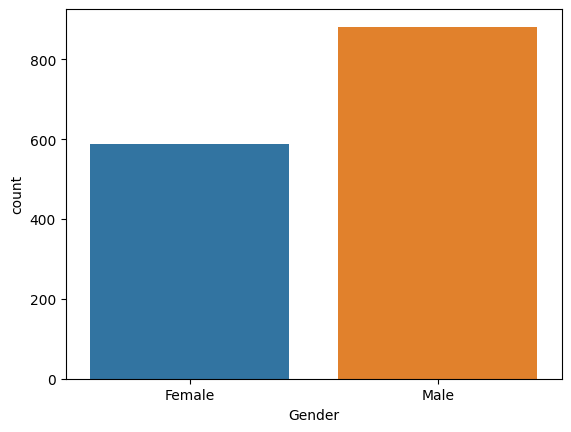

                  EducationField     Ration
EducationField                             
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735
##########################################



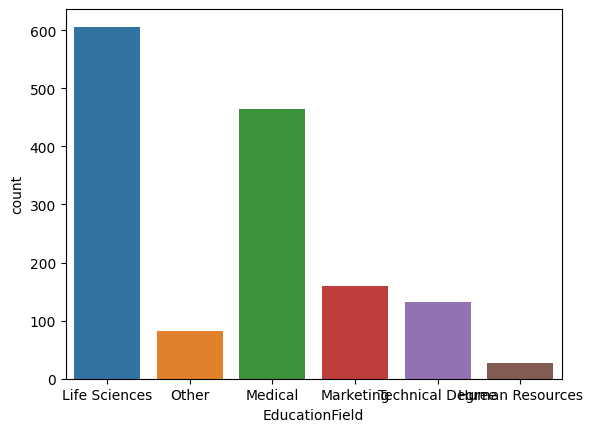

In [24]:
from tez_calisma.notebooks.utils import cat_summary

cat_summary(df, "Gender" ,True)
cat_summary(df, "EducationField" ,True)

           Attrition     Ration
Attrition                      
No              1233  83.877551
Yes              237  16.122449
##########################################



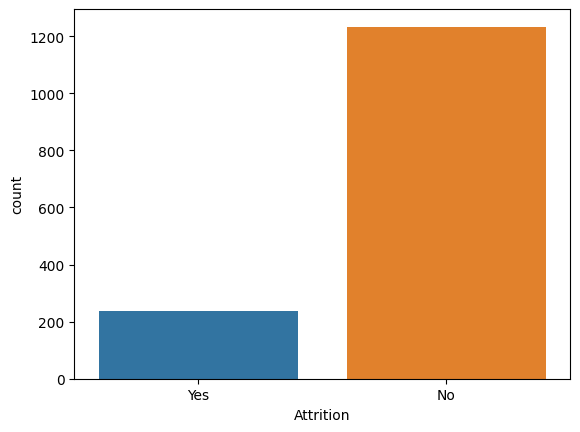

                   BusinessTravel     Ration
BusinessTravel                              
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082
##########################################



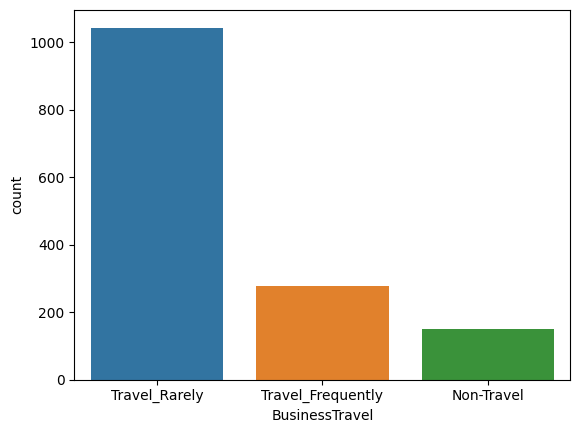

                        Department     Ration
Department                                   
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714
##########################################



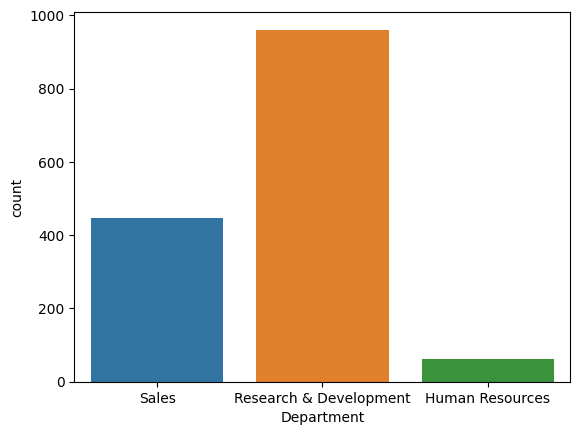

                  EducationField     Ration
EducationField                             
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735
##########################################



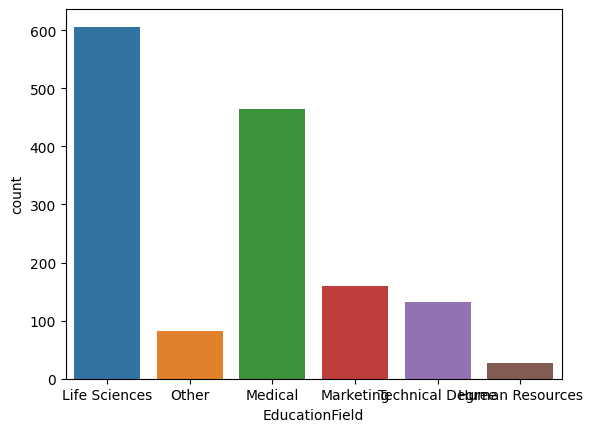

        Gender  Ration
Gender                
Male       882    60.0
Female     588    40.0
##########################################



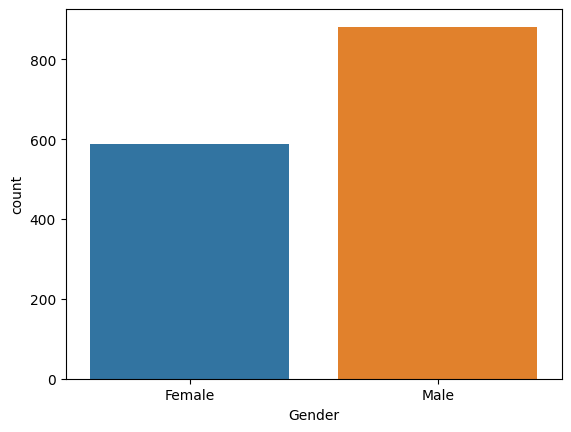

                           JobRole     Ration
JobRole                                      
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415
##########################################



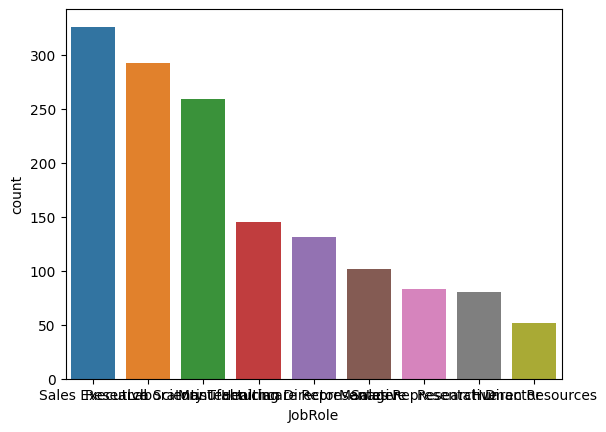

               MaritalStatus     Ration
MaritalStatus                          
Married                  673  45.782313
Single                   470  31.972789
Divorced                 327  22.244898
##########################################



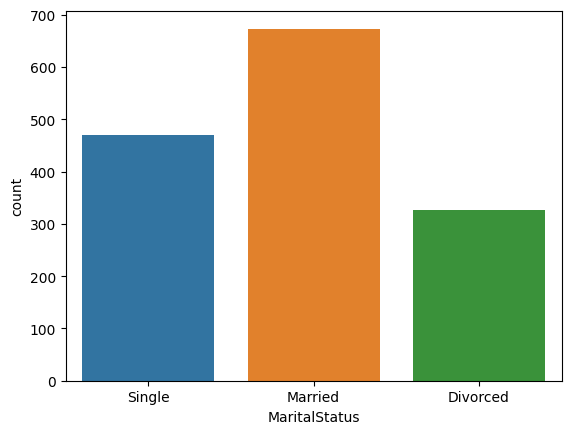

        Over18  Ration
Over18                
Y         1470   100.0
##########################################



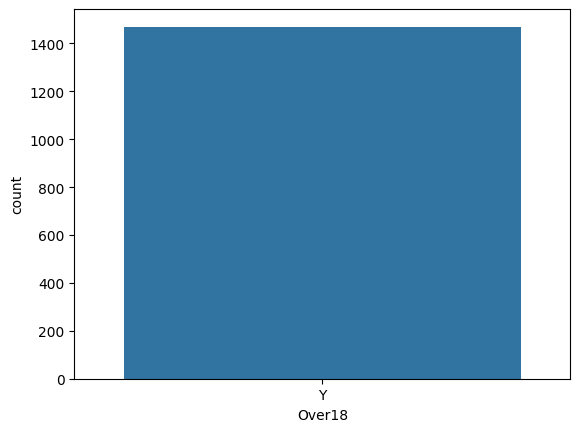

          OverTime    Ration
OverTime                    
No            1054  71.70068
Yes            416  28.29932
##########################################



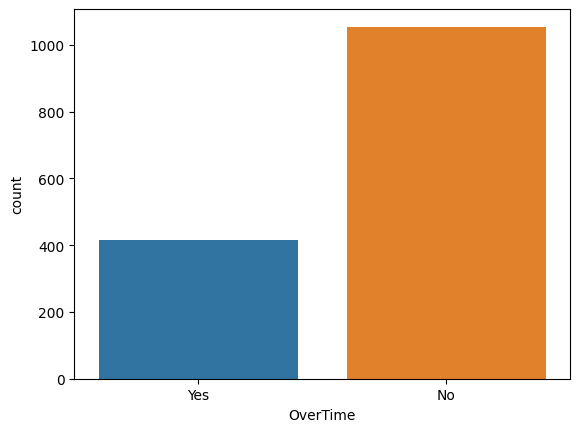

In [25]:
df_cat = df[cat_cols]
for col in df_cat.columns:
    cat_summary(df_cat, col ,True)

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [27]:
# değişkenler altalta kalır
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

9 columns were label encoded.


In [28]:

print(df.dtypes)

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [29]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [31]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1.0,5.0,3.579098,5.0,0.000000,1.25,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588
1,3.690476,0.0,2.5,0.633500,2.5,1.250000,0.00,1.0,0.0,0.002419,...,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824
2,2.261905,1.0,5.0,4.549034,2.5,0.178571,1.25,4.0,0.0,0.007257,...,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000
3,1.785714,0.0,2.5,4.617037,2.5,0.357143,3.75,1.0,0.0,0.009676,...,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000
4,1.071429,0.0,5.0,1.750179,2.5,0.178571,0.00,3.0,0.0,0.014514,...,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235


## Imbalance data check and resampling the attrition "yes" data

In [38]:
#imbalanced data control
df['Attrition'].value_counts()
#The class in an imbalanced classification predictive modeling problem that has slightly more examples.
#thus, there is no imbalanced data problem, but we can add some sampling in data get equal sample

Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

<Axes: >

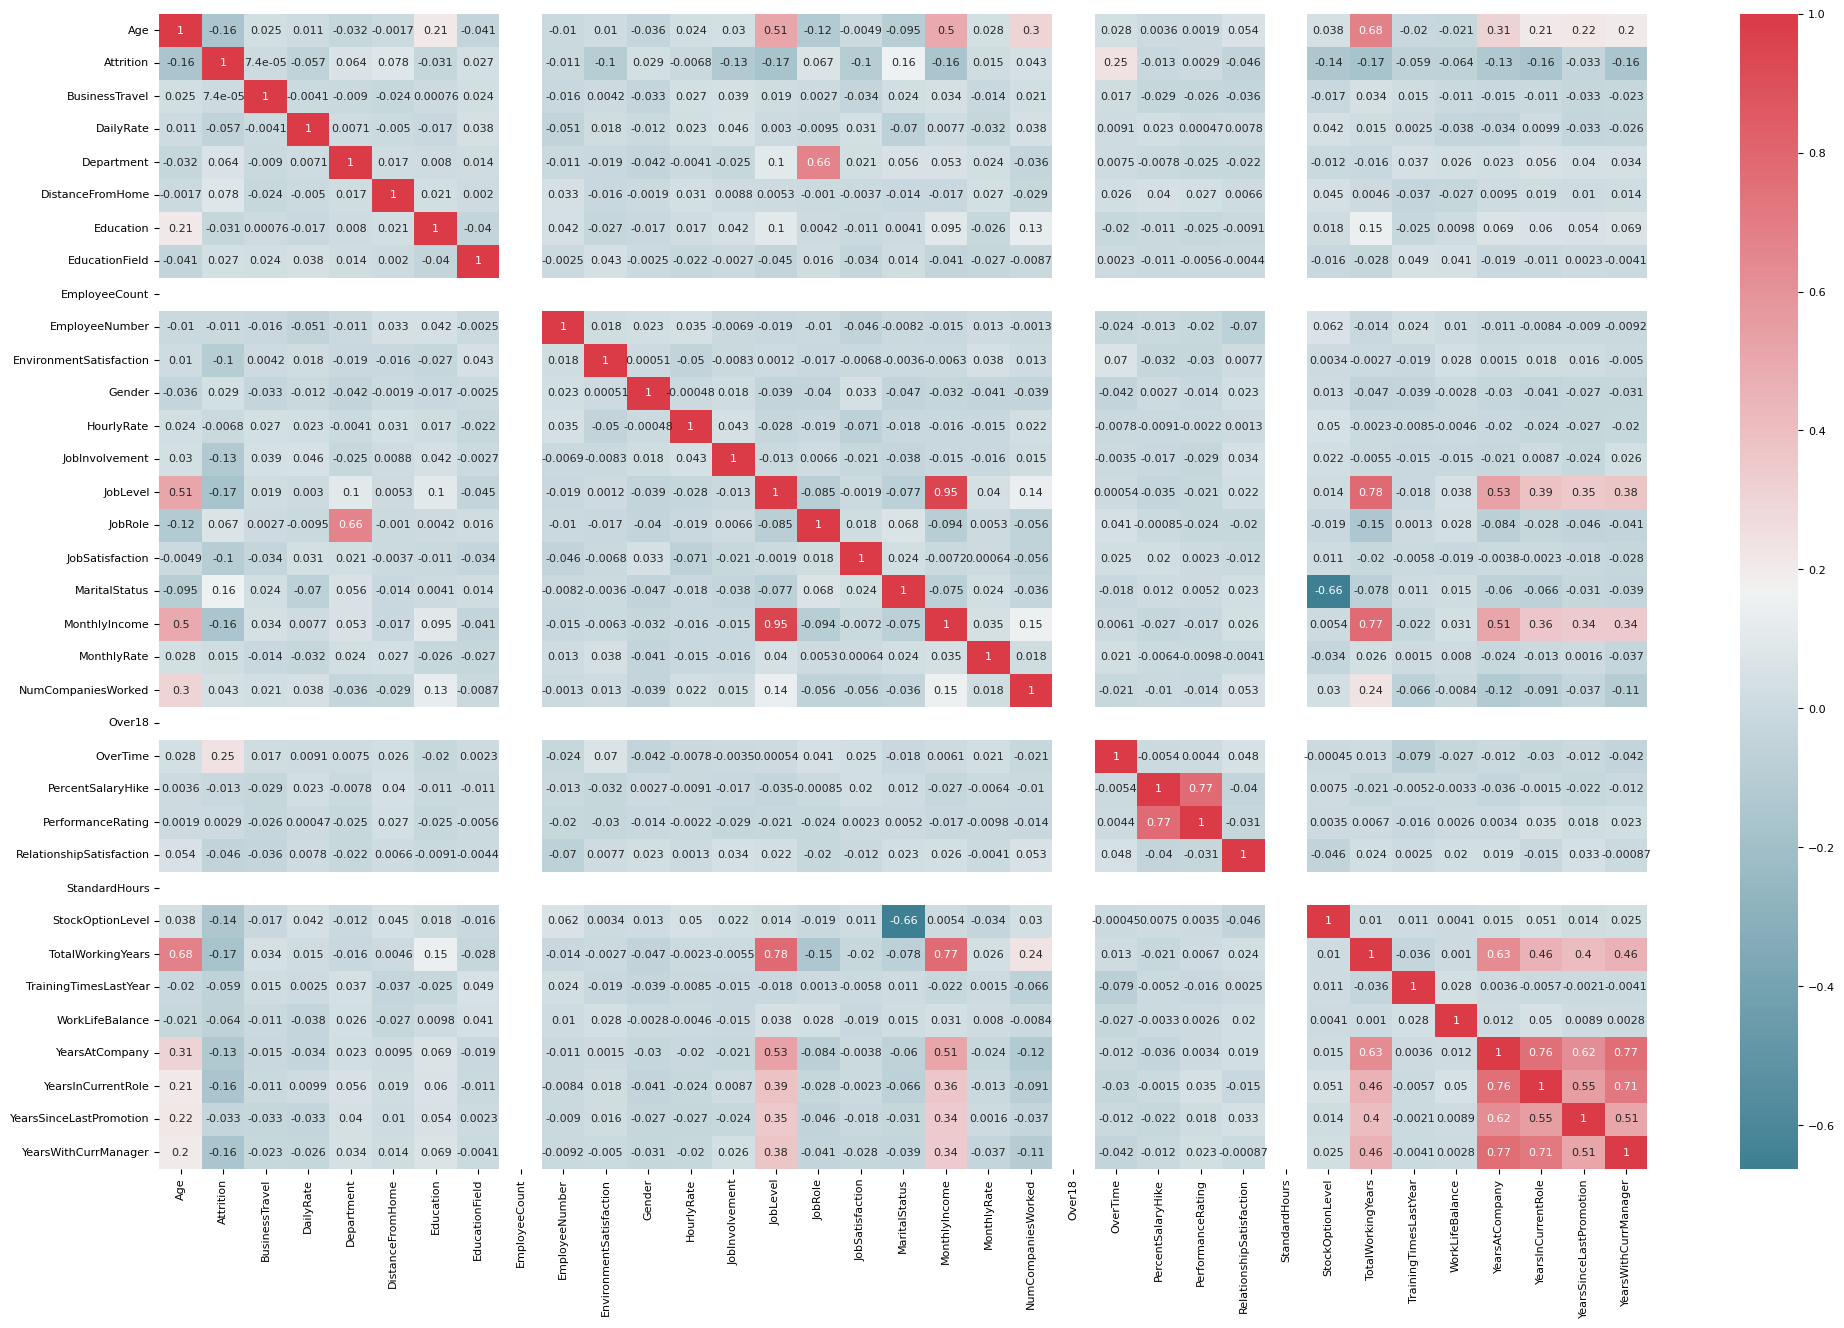

In [50]:
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

matplotlib.rcParams.update({'font.size': 8})
plt.figure(figsize= (24,15))
sns.heatmap(df.corr(), annot = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))

In [51]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (1470, 35)


In [52]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1.0,5.0,3.579098,5.0,0.000000,1.25,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588
1,3.690476,0.0,2.5,0.633500,2.5,1.250000,0.00,1.0,0.0,0.002419,...,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824
2,2.261905,1.0,5.0,4.549034,2.5,0.178571,1.25,4.0,0.0,0.007257,...,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000
3,1.785714,0.0,2.5,4.617037,2.5,0.357143,3.75,1.0,0.0,0.009676,...,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000
4,1.071429,0.0,5.0,1.750179,2.5,0.178571,0.00,3.0,0.0,0.014514,...,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235


## 5.Verilerin eğitim ve test olarak bölünmesi



In [53]:

y=df["Attrition"]
X=df.drop(["Attrition"] , axis = 1)


## Farklı yöntemle bölme ve verileri eğitme

In [54]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y, shuffle=True)

Logistic Classifier
Logistic Classifier Model Dogrulugu: 0.8653061224489796


C:\Users\24496128680\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


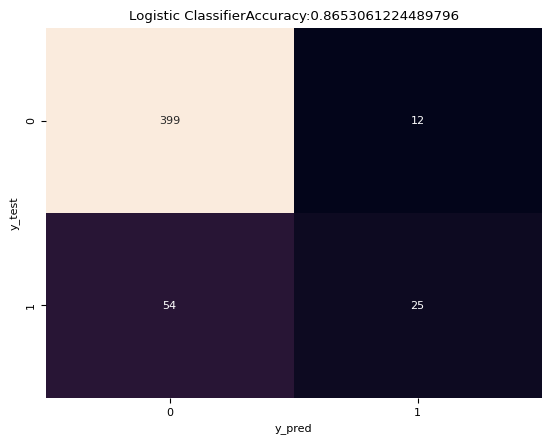

Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       411
         1.0       0.68      0.32      0.43        79

    accuracy                           0.87       490
   macro avg       0.78      0.64      0.68       490
weighted avg       0.85      0.87      0.84       490

########################################


Support Vector Machine 
Support Vector Machine  Model Dogrulugu: 0.8612244897959184


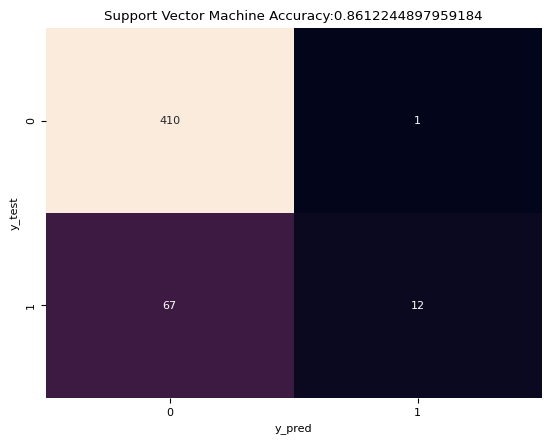

Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       411
         1.0       0.92      0.15      0.26        79

    accuracy                           0.86       490
   macro avg       0.89      0.57      0.59       490
weighted avg       0.87      0.86      0.82       490

########################################


K-Neighbors Classifier
K-Neighbors Classifier Model Dogrulugu: 0.8367346938775511


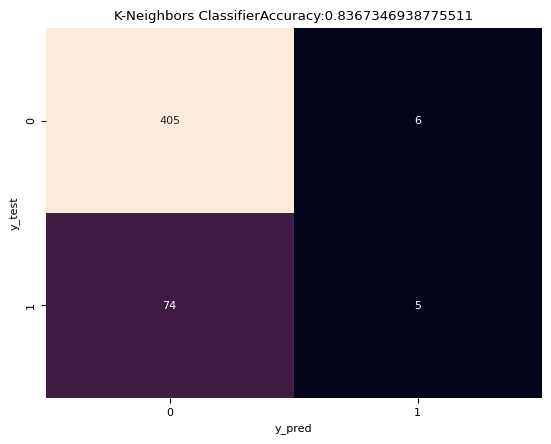

Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       411
         1.0       0.45      0.06      0.11        79

    accuracy                           0.84       490
   macro avg       0.65      0.52      0.51       490
weighted avg       0.78      0.84      0.78       490

########################################


Decision Tree
Decision Tree Model Dogrulugu: 0.773469387755102


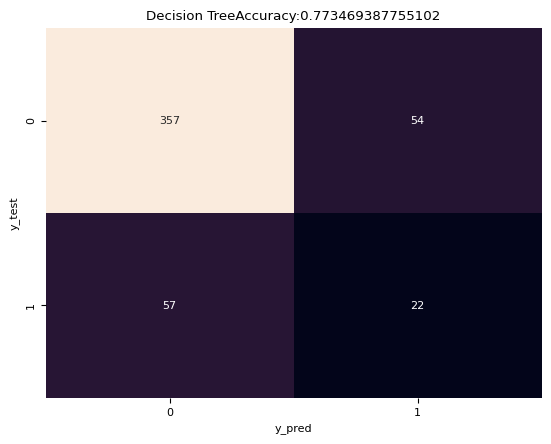

Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       411
         1.0       0.29      0.28      0.28        79

    accuracy                           0.77       490
   macro avg       0.58      0.57      0.57       490
weighted avg       0.77      0.77      0.77       490

########################################


Random Forest
Random Forest Model Dogrulugu: 0.8387755102040816


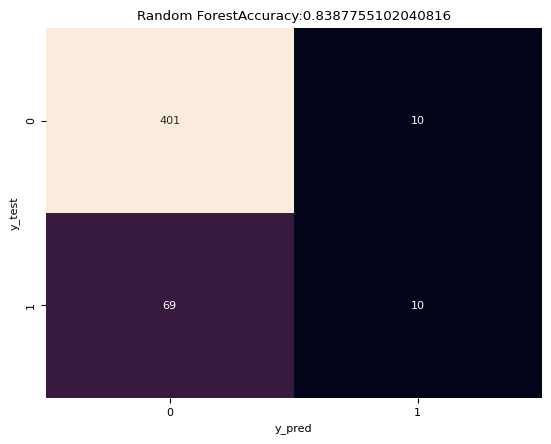

Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       411
         1.0       0.50      0.13      0.20        79

    accuracy                           0.84       490
   macro avg       0.68      0.55      0.56       490
weighted avg       0.80      0.84      0.80       490

########################################


Naive Bias Classifier
Naive Bias Classifier Model Dogrulugu: 0.8285714285714286


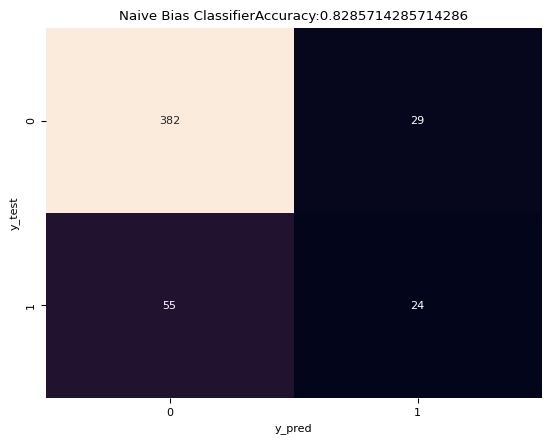

Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       411
         1.0       0.45      0.30      0.36        79

    accuracy                           0.83       490
   macro avg       0.66      0.62      0.63       490
weighted avg       0.81      0.83      0.81       490

########################################




In [55]:
#model importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection

models = {
 "Logistic Classifier":LogisticRegression(),
 "Support Vector Machine ":SVC(),
 "K-Neighbors Classifier":KNeighborsClassifier(),
 "Decision Tree":DecisionTreeClassifier(),
 "Random Forest":RandomForestClassifier(),
 "Naive Bias Classifier":BernoulliNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_train,y_train)
    #model Prediction
    y_pred = model.predict(X_test)
    accuracy_skor= accuracy_score(y_test,y_pred)
    print(list(models.keys())[i])

    print(list(models.keys())[i],'Model Dogrulugu:', accuracy_skor)

    cf_matrix_log_model=confusion_matrix(y_test,y_pred)
    sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
    log_model_score=accuracy_score(y_test, y_pred)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(list(models.keys())[i]+ "Accuracy:"+str(log_model_score))
    plt.show()


    print("Sınıflandırma Raporu")
    print(classification_report(y_test, y_pred))
    print("#"*40)
    print('\n')


## SVM Model with GridSearchCV and Evaluation

In [57]:
from sklearn.model_selection import GridSearchCV
### Apply SVM model

from sklearn.svm import SVC
clssfr = SVC(random_state = 2)
parameters = {
    'kernel'  : ['linear',  'sigmoid'],
    'C'       : np.logspace(-3,3)
}
clssfr_cv= GridSearchCV(clssfr,parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.5998587...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'kernel': ['linear', 'sigmoid']})

In [23]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

NameError: name 'clssfr_cv' is not defined

In [58]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       411
         1.0       0.79      0.28      0.41        79

    accuracy                           0.87       490
   macro avg       0.83      0.63      0.67       490
weighted avg       0.86      0.87      0.84       490

